In [108]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [109]:
url = "http://www.ncei.noaa.gov/thredds/dodsC/uv/6h_agg_rt/Preliminary_Aggregation_of_6h_Ocean_Wind_best.ncd"

In [137]:
ds['lat']

<xarray.DataArray 'lat' (lat: 81)>
array([ 40.  ,  40.25,  40.5 ,  40.75,  41.  ,  41.25,  41.5 ,  41.75,  42.  ,
        42.25,  42.5 ,  42.75,  43.  ,  43.25,  43.5 ,  43.75,  44.  ,  44.25,
        44.5 ,  44.75,  45.  ,  45.25,  45.5 ,  45.75,  46.  ,  46.25,  46.5 ,
        46.75,  47.  ,  47.25,  47.5 ,  47.75,  48.  ,  48.25,  48.5 ,  48.75,
        49.  ,  49.25,  49.5 ,  49.75,  50.  ,  50.25,  50.5 ,  50.75,  51.  ,
        51.25,  51.5 ,  51.75,  52.  ,  52.25,  52.5 ,  52.75,  53.  ,  53.25,
        53.5 ,  53.75,  54.  ,  54.25,  54.5 ,  54.75,  55.  ,  55.25,  55.5 ,
        55.75,  56.  ,  56.25,  56.5 ,  56.75,  57.  ,  57.25,  57.5 ,  57.75,
        58.  ,  58.25,  58.5 ,  58.75,  59.  ,  59.25,  59.5 ,  59.75,  60.  ], dtype=float32)
Coordinates:
  * lat      (lat) float32 40.0 40.25 40.5 40.75 41.0 41.25 41.5 41.75 42.0 ...
Attributes:
    units:                degrees_north
    long_name:            latitude
    grids:                uniform grids from -89.75 to 89.

In [110]:
t_min = np.datetime64('2015-06-01T00:00:00')
t_max = np.datetime64('2015-06-02T00:00:00')
x_min = 360-60
x_max = 360-40
y_min = 40
y_max = 60

In [111]:
ds = xr.open_dataset(url).sel(
                                time = slice(t_min, t_max),
                                lat = slice(y_min, y_max), 
                                lon = slice(x_min, x_max))

In [112]:
ds.variables['time'].values

array(['2015-06-01T00:00:00.000000000', '2015-06-01T06:00:00.000000000',
       '2015-06-01T12:00:00.000000000', '2015-06-01T18:00:00.000000000',
       '2015-06-02T00:00:00.000000000'], dtype='datetime64[ns]')

In [113]:
ds.variables['lon']

<xarray.IndexVariable 'lon' (lon: 81)>
array([ 300.  ,  300.25,  300.5 ,  300.75,  301.  ,  301.25,  301.5 ,  301.75,
        302.  ,  302.25,  302.5 ,  302.75,  303.  ,  303.25,  303.5 ,  303.75,
        304.  ,  304.25,  304.5 ,  304.75,  305.  ,  305.25,  305.5 ,  305.75,
        306.  ,  306.25,  306.5 ,  306.75,  307.  ,  307.25,  307.5 ,  307.75,
        308.  ,  308.25,  308.5 ,  308.75,  309.  ,  309.25,  309.5 ,  309.75,
        310.  ,  310.25,  310.5 ,  310.75,  311.  ,  311.25,  311.5 ,  311.75,
        312.  ,  312.25,  312.5 ,  312.75,  313.  ,  313.25,  313.5 ,  313.75,
        314.  ,  314.25,  314.5 ,  314.75,  315.  ,  315.25,  315.5 ,  315.75,
        316.  ,  316.25,  316.5 ,  316.75,  317.  ,  317.25,  317.5 ,  317.75,
        318.  ,  318.25,  318.5 ,  318.75,  319.  ,  319.25,  319.5 ,  319.75,
        320.  ], dtype=float32)
Attributes:
    units:                degrees_east
    long_name:            longitude
    grids:                uniform grids from 0.00 to

In [114]:
ds.variables

Frozen(OrderedDict([('zlev', <xarray.IndexVariable 'zlev' (zlev: 1)>
array([ 10.], dtype=float32)
Attributes:
    units:                   meters
    long_name:               height above sea level
    _CoordinateAxisType:     Height
    positive:                up
    _CoordinateZisPositive:  up), ('lat', <xarray.IndexVariable 'lat' (lat: 81)>
array([ 40.  ,  40.25,  40.5 ,  40.75,  41.  ,  41.25,  41.5 ,  41.75,  42.  ,
        42.25,  42.5 ,  42.75,  43.  ,  43.25,  43.5 ,  43.75,  44.  ,  44.25,
        44.5 ,  44.75,  45.  ,  45.25,  45.5 ,  45.75,  46.  ,  46.25,  46.5 ,
        46.75,  47.  ,  47.25,  47.5 ,  47.75,  48.  ,  48.25,  48.5 ,  48.75,
        49.  ,  49.25,  49.5 ,  49.75,  50.  ,  50.25,  50.5 ,  50.75,  51.  ,
        51.25,  51.5 ,  51.75,  52.  ,  52.25,  52.5 ,  52.75,  53.  ,  53.25,
        53.5 ,  53.75,  54.  ,  54.25,  54.5 ,  54.75,  55.  ,  55.25,  55.5 ,
        55.75,  56.  ,  56.25,  56.5 ,  56.75,  57.  ,  57.25,  57.5 ,  57.75,
        58.  ,  58.25

In [115]:
ds.variables['lon']

<xarray.IndexVariable 'lon' (lon: 81)>
array([ 300.  ,  300.25,  300.5 ,  300.75,  301.  ,  301.25,  301.5 ,  301.75,
        302.  ,  302.25,  302.5 ,  302.75,  303.  ,  303.25,  303.5 ,  303.75,
        304.  ,  304.25,  304.5 ,  304.75,  305.  ,  305.25,  305.5 ,  305.75,
        306.  ,  306.25,  306.5 ,  306.75,  307.  ,  307.25,  307.5 ,  307.75,
        308.  ,  308.25,  308.5 ,  308.75,  309.  ,  309.25,  309.5 ,  309.75,
        310.  ,  310.25,  310.5 ,  310.75,  311.  ,  311.25,  311.5 ,  311.75,
        312.  ,  312.25,  312.5 ,  312.75,  313.  ,  313.25,  313.5 ,  313.75,
        314.  ,  314.25,  314.5 ,  314.75,  315.  ,  315.25,  315.5 ,  315.75,
        316.  ,  316.25,  316.5 ,  316.75,  317.  ,  317.25,  317.5 ,  317.75,
        318.  ,  318.25,  318.5 ,  318.75,  319.  ,  319.25,  319.5 ,  319.75,
        320.  ], dtype=float32)
Attributes:
    units:                degrees_east
    long_name:            longitude
    grids:                uniform grids from 0.00 to

# Plot

In [116]:
from icedef import plot

In [119]:
ds['lon'][-1]

<xarray.DataArray 'lon' ()>
array(320.0, dtype=float32)
Coordinates:
    lon      float32 320.0
Attributes:
    units:                degrees_east
    long_name:            longitude
    grids:                uniform grids from 0.00 to 359.75 by 0.25
    _CoordinateAxisType:  Lon
    standard_name:        longitude

In [120]:
lats = np.asarray(ds.lat)
lons = np.asarray(ds.lon) - 360

In [121]:
u = np.asarray(ds.u)[:,0,:,:]

v = np.asarray(ds.v)[:,0,:,:]

In [122]:
u.shape

(5, 81, 81)

In [123]:
np.where(np.isnan(u))

(array([0, 0, 0, ..., 4, 4, 4]),
 array([ 0,  0,  0, ..., 80, 80, 80]),
 array([ 0,  1,  2, ..., 78, 79, 80]))

In [124]:
tis, yis, xis = np.where(np.isnan(u))
bad_lats = lats[yis]
bad_lons = lons[xis]


In [125]:
u[4, 80, 80]

nan

In [126]:
yis

array([ 0,  0,  0, ..., 80, 80, 80])

In [127]:
tis

array([0, 0, 0, ..., 4, 4, 4])

In [128]:
xis

array([ 0,  1,  2, ..., 78, 79, 80])

In [129]:
max(u.flatten())

nan

In [130]:
len(bad_lons)

13909

In [131]:
len(bad_lats)

13909

In [132]:
bad_lons

array([-60.  , -59.75, -59.5 , ..., -40.5 , -40.25, -40.  ], dtype=float32)

/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


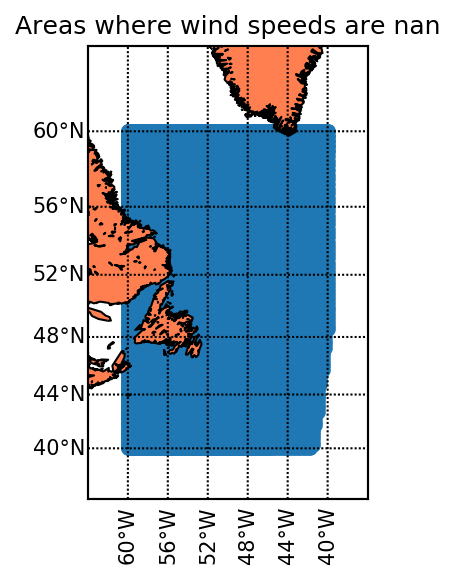

In [133]:
fig, ax = plt.subplots(dpi=150)
m = plot.get_mercator_basemap(bad_lons[0], bad_lons[-1], bad_lats[0], bad_lats[-1])

xs, ys = m(bad_lons, bad_lats)

ax.scatter(xs, ys)
plt.title('Areas where wind speeds are nan')
plt.show()

In [105]:
np.mean(u[~np.nan(u)])

TypeError: 'float' object is not callable

In [107]:
v

array([[[        nan,         nan,         nan, ...,  6.24250364,
          5.72690105,         nan],
        [        nan,         nan,         nan, ...,  6.30847359,
          5.52858734,         nan],
        [        nan,         nan,         nan, ...,  6.9082942 ,
          7.24985123,         nan],
        ..., 
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,  2.94563079,
          2.51748228,         nan],
        [        nan,         nan,         nan, ...,  3.17055464,
          1.52119076,         nan],
        [        nan,         nan,         nan, ...,  3.29515171,
          4.02740049,         nan],
        ..., 
        [        nan,         nan,         nan, ...,